### Цель

Предсказать летальный исход пациента от сердечной недостаточности

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # классификация методом ближайших соседей
from sklearn.model_selection import GridSearchCV, cross_val_score # поиск наилучших параметров
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Современные методы анализа данных\ML\итоговый дневник\dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
X = df.iloc[:, 1:9].values
y = df.iloc[:,12].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

#### DecisionTreeClassifier

In [6]:
#обычное дерево
tree = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_split=35)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.7577319587628866, 0.7428571428571429)

In [7]:
#оценка качества модели
y_pred_tree = tree.predict(X_test)
print('accuracy_score (tree_test): ', metrics.accuracy_score(y_test, y_pred_tree))
print('accuracy_score (tree_train): ', metrics.accuracy_score(y_train, tree.predict(X_train)))
print('f1 score (tree_test): ', metrics.f1_score(y_test, y_pred_tree))
print('f1 score (tree_train): ', metrics.f1_score(y_train, tree.predict(X_train)))

accuracy_score (tree_test):  0.7428571428571429
accuracy_score (tree_train):  0.7577319587628866
f1 score (tree_test):  0.42553191489361697
f1 score (tree_train):  0.5154639175257733


Лчшие параметры дерева - 'max_depth': 2, 'min_samples_split': 35.

Модель, построенная на основе дерева показывает неплохое качество классификации на тренировочной выборке, при этом не теря Score на тестовой выборке.

#### Классификация методом ближайших соседей

In [8]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.6958762886597938, 0.638095238095238)

In [9]:
# подбор наилучших значений параметров модели
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [10]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [11]:
knn_grid.best_params_

{'knn__n_neighbors': 3}

In [12]:
knn2 = KNeighborsClassifier(n_neighbors=3)

knn2.fit(X_train, y_train)
knn2.score(X_train, y_train), knn.score(X_test, y_test)

(0.7680412371134021, 0.638095238095238)

Точность модели значительно проседает на тестовой выборке. Она явно переобучена. Модель построенная на основе дерева лучше решает задачу по сравнению с knn моделью. Различие между тренировочной и тестовой выборками минимальное, при довольно высоком Score. При выставлении параметра n_neighbors = 10, качество тренировочной выборки ниже, но тестовая выборка проседает не так сильно, как в случае со значением параметра равным 3. При построении ансамбля моделей методом Voting буду использовать модель с n_neighbors = 10

#### Логистическая регрессия

In [13]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear")
logreg.fit(X_train, y_train)
(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

(0.6907216494845361, 0.6666666666666666)

Логистическая регрессия имеет лучшее качество классификации на тестовой выборке по сравнению с моделью knn, но она уступает в качестве, модели построенной на основе дерева. 

#### Сводная таблица по результатам классификации не ансамблевыми моделями

In [14]:
frame = pd.DataFrame()
new_line = [{'model':'Tree', 'score_train':0.7577319587628866, 'score_test':0.7428571428571429}, 
            {'model':'KNeighbors', 'score_train':0.6958762886597938, 'score_test':0.638095238095238},
            {'model':'log_reg', 'score_train':0.6907216494845361, 'score_test':0.6666666666666666}]
frame = frame.append(new_line, ignore_index=True)
frame

,model,score_train,score_test
0,Tree,0.757732,0.742857
1,KNeighbors,0.695876,0.638095
2,log_reg,0.690722,0.666667


Наиучший результат показала модель, построенная на основе дерева (параметры: max_depth - 6, max_features - 2).

In [15]:
print(frame.iloc[0,])

model              Tree
score_train    0.757732
score_test     0.742857
Name: 0, dtype: object


#### Voting

In [16]:
from sklearn.ensemble import VotingClassifier
modelVote = VotingClassifier(estimators=[('lr', logreg), ('dt', tree), ('KNeighbors', knn)], voting='hard')
modelVote.fit(X_train,y_train)
modelVote.score(X_train,y_train), modelVote.score(X_test,y_test)

(0.6907216494845361, 0.6952380952380952)

## RandomForest

#### RandomForest (1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, 
                                 max_features=4, 
                                 max_depth=2,  
                                 min_samples_leaf=10, 
                                 min_samples_split=30, 
                                 random_state=42)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

(0.7938144329896907, 0.7714285714285715)

#### RandomForest (2)

In [18]:
forest_params = {'max_depth': range(1,11),
'max_features': range(2,9)}

forest_grid = GridSearchCV(modelRF, forest_params,
cv=5, n_jobs=-1,
verbose=True)

In [19]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, max_features=4,
                                              min_samples_leaf=10,
                                              min_samples_split=30,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(2, 9)},
             verbose=True)

In [20]:
forest_grid.best_params_

{'max_depth': 3, 'max_features': 3}

In [21]:
forest_grid.score(X_train, y_train), forest_grid.score(X_test, y_test)

(0.7989690721649485, 0.7523809523809524)

Две модели RandomForest имеют одинаковое качество классификации на обучающей выборке, но качество классификации на тестовой выборке лучше в первой модели. При выборе лучшей модели из 2 вариантов, я бы остановился на первой. Если сравнивать RandomForest и Voting, то я выберу RandomForest. У модели лучше качество, а разница в точности между тестовой и обучающей выборками не является критичной.

#### RandomForest (1)

In [22]:
from sklearn.metrics import classification_report
print('train', classification_report(y_train, modelRF.predict(X_train)))
print('test', classification_report(y_test, modelRF.predict(X_test)))

print('accuracy_score (tree_train): ', metrics.accuracy_score(y_train, tree.predict(X_train)))
print('accuracy_score (tree_test): ', metrics.accuracy_score(y_test, y_pred_tree))
print('f1 score (tree_train): ', metrics.f1_score(y_train, tree.predict(X_train)))
print('f1 score (tree_test): ', metrics.f1_score(y_test, y_pred_tree))

train               precision    recall  f1-score   support

           0       0.79      0.95      0.86       131
           1       0.83      0.46      0.59        63

    accuracy                           0.79       194
   macro avg       0.81      0.71      0.73       194
weighted avg       0.80      0.79      0.77       194

test               precision    recall  f1-score   support

           0       0.77      0.96      0.85        72
           1       0.80      0.36      0.50        33

    accuracy                           0.77       105
   macro avg       0.78      0.66      0.68       105
weighted avg       0.78      0.77      0.74       105

accuracy_score (tree_train):  0.7577319587628866
accuracy_score (tree_test):  0.7428571428571429
f1 score (tree_train):  0.5154639175257733
f1 score (tree_test):  0.42553191489361697


Метрики качества модели RandomForest (1) в сравнении с метриками не ансамблевой модели (tree) лучше. Попробую посмотреть какие переменные в модели имеют наибольший вес и оставлю только две наиболее значимые. И на основе них построю новую модель.

In [23]:
X_columns = df.iloc[:, 1:9]
pd.DataFrame({'feature': X_columns.columns,
              'importance': modelRF.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,serum_creatinine,0.434690
3,ejection_fraction,0.333136
7,serum_sodium,0.117770
5,platelets,0.059933
1,creatinine_phosphokinase,0.041774
2,diabetes,0.005113
0,anaemia,0.004168
4,high_blood_pressure,0.003416


Наиболее значимыми переменными в модели оказались serum_creatinine, ejection_fraction. Они дают наибольший вклад. Эти показатели анализа крови являются очень важными и по их значениям можно понять, есть ли у человека сердечно-сосудистые заболевания или нет.

Попробую разделить людей на максимально отличающиеся подгруппы по бинарной переменной (летальный исход от сердечной недостаточности) методом Subgroup Discovery. Должны получиться группы, у которых ярко выражены 1-2 переменные (условия в SubgroupDiscoveryTask). Условия должны содержать переменные serum_creatinine и/или ejection_fraction.

In [24]:
import pysubgroup as ps

df = df.drop(columns=['age', 'sex', 'smoking', 'time'])

target = ps.BinaryTarget("DEATH_EVENT", True) # Целевая переменная - бинарная
searchspace = ps.create_selectors(df, ignore=['DEATH_EVENT'])

task = ps.SubgroupDiscoveryTask (
    df,
    target,
    searchspace,
    result_set_size=5,# 5 different groups
    depth=2, # max условий
    qf=ps.WRAccQF() # Выбрал метрику качества Weighted Relative Accuracy
)

result = ps.BeamSearch().execute(task) # Поиск подгрупп происходит методом BeamSearch
result.to_dataframe()

C:\Users\miste\AppData\Local\Temp/ipykernel_13172/3605305602.py:18: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  result.to_dataframe()


,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.068277,serum_creatinine>=1.70,61.0,299.0,40.0,96.0,238.0,0.204013,0.795987,0.416667,0.583333,0.655738,0.235294,0.32107,2.042350
1,0.063735,ejection_fraction<30,59.0,299.0,38.0,96.0,240.0,0.197324,0.802676,0.395833,0.604167,0.644068,0.241667,0.32107,2.006003
2,0.042807,diabetes==0 AND ejection_fraction<30,38.0,299.0,25.0,96.0,261.0,0.127090,0.872910,0.260417,0.739583,0.657895,0.272031,0.32107,2.049068
3,0.042807,diabetes==0 AND serum_creatinine>=1.70,38.0,299.0,25.0,96.0,261.0,0.127090,0.872910,0.260417,0.739583,0.657895,0.272031,0.32107,2.049068
4,0.038266,anaemia==0 AND serum_creatinine>=1.70,36.0,299.0,23.0,96.0,263.0,0.120401,0.879599,0.239583,0.760417,0.638889,0.277567,0.32107,1.989873


Лица у которых креатинин в крови больше 1.7, подвержены риску смерти от сердечной недостаточности (они умирают в 65% случаев). Люди со значением фракции выброса сердца меньше 30 тоже выделены в отдельную подгруппу и имеют показатель смертности 64%. В остальных 3 подгруппах также содержатся люди у которых значения креатинина в сыворотке крови и уровень фракции выброса сердца отклоняются от нормальных значений. У 3 и 4 подгруппы показатель смертности составляет 66%, а у 5 подгруппы 64%. Во всех подгруппах содержатся переменные, которые имели наибольший вес в модели RandomForest - serum_creatinine и ejection_fraction. Значит их влияние в модели и в действительности (на данных пациентов) очень велико.

Исследуем динамику изменения для второй по значимости переменной модели RandomForest - ejection_fraction

In [25]:
from pycebox.ice import ice, ice_plot
X_train_df = pd.DataFrame(X_train, columns=list(X_columns.columns))

def predict_new(X):
    return modelRF.predict_proba(X)[:,1]

BMIbag = ice(data=X_train_df, column='ejection_fraction', 
                   predict=predict_new) 

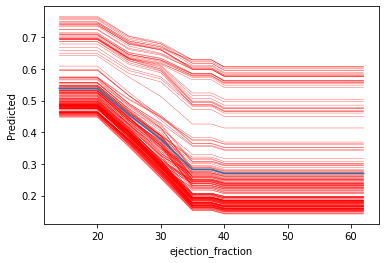

In [26]:
ice_plot(BMIbag, c='red', linewidth=0.3, plot_pdp=True)
plt.ylabel('Predicted')
plt.xlabel('ejection_fraction');

В среднем, модель показывает, что чем больше значение фракции выброса сердца, тем ниже вероятность летального исхода от сердечной недостаточности. Это соотносится с реальностью.

Построим 3 модель RandomForest, где оставим только 2 зависимые переменные - serum_creatinine и ejection_fraction. 

#### RandomForest (3)

In [27]:
df2 = pd.read_csv(r'C:\Современные методы анализа данных\ML\итоговый дневник\dataset.csv')
X2 = df2[['serum_creatinine', 'ejection_fraction']].values
y2 = df2.iloc[:,12].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.35, random_state = 0)

In [28]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, 
                                 max_features=2, 
                                 max_depth=2,  
                                 min_samples_leaf=10, 
                                 min_samples_split=30, 
                                 random_state=2)
modelRF.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=10,
                       min_samples_split=30, random_state=2)

In [29]:
print('train', classification_report(y_train2, modelRF.predict(X_train2)))
print('test', classification_report(y_test2, modelRF.predict(X_test2)))

train               precision    recall  f1-score   support

           0       0.80      0.89      0.84       131
           1       0.69      0.54      0.61        63

    accuracy                           0.77       194
   macro avg       0.75      0.71      0.72       194
weighted avg       0.77      0.77      0.76       194

test               precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.68      0.52      0.59        33

    accuracy                           0.77       105
   macro avg       0.74      0.70      0.71       105
weighted avg       0.76      0.77      0.76       105



В сравнении с моделью RandomForest (1) значения метрик полчились практически такие же.

### GradientBoosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
modelAB = GradientBoostingClassifier(n_estimators=100, max_depth=2, max_features=3, random_state=23)
modelAB.fit(X_train, y_train)
modelAB.score(X_train, y_train), modelAB.score(X_test, y_test)

(0.8969072164948454, 0.7523809523809524)

Модель сильно переобучена. Попробуем подобрать оптимальное количество деревьев в модели (параметр - n_estimators)

In [31]:
score = [metrics.accuracy_score(y_test, y_pred) for y_pred in modelAB.staged_predict(X_test)]

In [32]:
best_estimator = np.argmax(score)

In [33]:
modelAB2 = GradientBoostingClassifier(n_estimators=best_estimator, max_depth=2, max_features=3, random_state=24)
modelAB2.fit(X_train, y_train)
modelAB2.score(X_train, y_train), modelAB2.score(X_test, y_test)

(0.7989690721649485, 0.7428571428571429)

In [36]:
best_estimator

17

In [37]:
print('train', classification_report(y_train, modelAB2.predict(X_train)))
print('test', classification_report(y_test, modelAB2.predict(X_test)))

train               precision    recall  f1-score   support

           0       0.79      0.96      0.87       131
           1       0.85      0.46      0.60        63

    accuracy                           0.80       194
   macro avg       0.82      0.71      0.73       194
weighted avg       0.81      0.80      0.78       194

test               precision    recall  f1-score   support

           0       0.75      0.94      0.83        72
           1       0.71      0.30      0.43        33

    accuracy                           0.74       105
   macro avg       0.73      0.62      0.63       105
weighted avg       0.74      0.74      0.71       105



RandomForest(1)

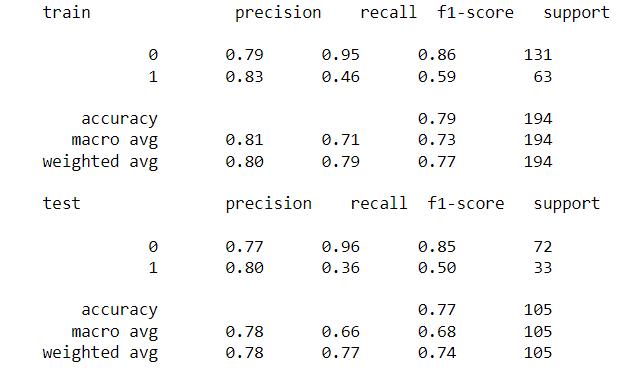

Модель GradientBoosting показывает хороший результат на тренировочной выборке. Score такой же как у модели RandomForest(1), которую я выбрал в качестве итоговой для дальнейшего сравнения. Score на тестовой выборке у модели GBM ниже.

Параметры precision, recall, f1-score на тестововой выборке в модели RandomForest(1) лучше чем в модели GradientBoosting. На тренирововчной выборке некоторые значения параметров модели GradientBoosting лучше. Больше точность. Но это различие не большое и не приходится говорить о том, что модель градиентного бустинга лучше.  

В качестве итоговой модели для предсказания летального исхода пациента от сердечной недостаточости я выберу ансамблевую модель на основе алгоритма Random Forest.